In [39]:
import pandas as pd
import numpy as np
attributes =['ID','Age','Number of years of experience','Annual Income','ZIPCode','Family size','Avgerage spending per month','Education Level','Mortgage Value of house if any','class','Does the customer have a securities account with the bank?','Does the customer have a certificate of deposit (CD) account with the bank?','Does the customer use internet banking facilities?','Does the customer uses a credit card issued by UniversalBank?']
#LoanData = pd.read_csv('data.csv',sep=',',header=None,names = attributes,index_col = False)
#by_class = LoanData.groupby('class')
#classOneData = by_class.get_group(float(1))
#classZeroData = by_class.get_group(float(0))
#trainClassOne = classOneData.sample(frac=0.8)
#trainClassZero = classZeroData.sample(frac=0.8)
#valClassOne = classOneData.loc[~classOneData.index.isin(trainClassOne.index)]
#valClassZero = classZeroData.loc[~classZeroData.index.isin(trainClassZero.index)]
#train = pd.concat([trainClassOne,trainClassZero], ignore_index=True)
#val = pd.concat([valClassOne,valClassZero], ignore_index=True)
##train = LoanData.sample(frac=0.8)
##val = LoanData.loc[~LoanData.index.isin(train.index)]
#train.to_csv('UsedTrainingDataForLoanDs.csv',sep=',',header=None,index = False)
#val.to_csv('UsedValidationDataForLoanDs.csv',sep=',',header=None,index = False)
train = pd.read_csv('UsedTrainingDataForLoanDs.csv',sep=',',header=None,names = attributes,index_col = False)
val = pd.read_csv('UsedValidationDataForLoanDs.csv',sep=',',header=None,names = attributes,index_col = False)

CategoricalAttributes = ['Education Level','Family size','Does the customer have a securities account with the bank?','Does the customer have a certificate of deposit (CD) account with the bank?','Does the customer use internet banking facilities?','Does the customer uses a credit card issued by UniversalBank?']
NumericalAttributes = ['Age','Number of years of experience','Annual Income','Avgerage spending per month','Mortgage Value of house if any']
attributes1 = ['ID','Age','Number of years of experience','Annual Income','ZIPCode','Family size','Avgerage spending per month','Education Level','Mortgage Value of house if any','Does the customer have a securities account with the bank?','Does the customer have a certificate of deposit (CD) account with the bank?','Does the customer use internet banking facilities?','Does the customer uses a credit card issued by UniversalBank?']
#'ZIPCode','Mortgage Value of house if any'
def getMeanVarForGivenList(GivenList):
    tempMean = sum(GivenList) / float(len(GivenList))
    tempVar = sum((xi - tempMean) ** 2 for xi in GivenList) / float((len(GivenList)-1))
    return [tempMean,tempVar]    
def getRelFreqAndMeanVarOfAttrFromTrainData():
    RelFreqValuesForCategoricalAttributes = {}
    for iter1 in CategoricalAttributes:
        #getting values of attributes for class = yes
        #getting values of attributes for class = no
        tempValuesOfAttrForClassYes = []
        tempValuesOfAttrForClassNo = []
        for index,row in train.iterrows():
            if int(train.at[int(index),'class']) == 1:
                tempValuesOfAttrForClassYes.append(str(int(train.at[int(index),iter1])))
            else:
                tempValuesOfAttrForClassNo.append(str(int(train.at[int(index),iter1])))
        NumberOfAttrValuesClassYes = len(tempValuesOfAttrForClassYes)   
        NumberOfAttrValuesClassNo = len(tempValuesOfAttrForClassNo) 
        #finding rel freq for unique values among class = yes
        #finding rel freq for unique values among class = no
        tempRelFreqOfAttrForClassYes = {}
        tempRelFreqOfAttrForClassNo = {}
        for iter2 in tempValuesOfAttrForClassYes:
            if iter2 in tempRelFreqOfAttrForClassYes:
                tempRelFreqOfAttrForClassYes[iter2] += 1
            else:
                tempRelFreqOfAttrForClassYes[iter2] = 1              
        for iter3 in tempRelFreqOfAttrForClassYes:
            tempRelFreqOfAttrForClassYes[iter3] /= float(NumberOfAttrValuesClassYes)
            
        for iter2 in tempValuesOfAttrForClassNo:
            if iter2 in tempRelFreqOfAttrForClassNo:
                tempRelFreqOfAttrForClassNo[iter2] += 1
            else:
                tempRelFreqOfAttrForClassNo[iter2] = 1              
        for iter3 in tempRelFreqOfAttrForClassNo:
            tempRelFreqOfAttrForClassNo[iter3] /= float(NumberOfAttrValuesClassNo)
        RelFreqValuesForCategoricalAttributes[iter1] = [tempRelFreqOfAttrForClassYes,tempRelFreqOfAttrForClassNo]
    
    MeanVarForNumericalAttributes = {}
    for iter1 in NumericalAttributes:
        tempValuesOfAttrForClassYes = []
        tempValuesOfAttrForClassNo = []
        for index,row in train.iterrows():
            if int(train.at[int(index),'class']) == 1:
                tempValuesOfAttrForClassYes.append(float(train.at[int(index),iter1]))
            else:
                tempValuesOfAttrForClassNo.append(float(train.at[int(index),iter1]))           
        MeanVarForNumericalAttributes[iter1] = [getMeanVarForGivenList(tempValuesOfAttrForClassYes),getMeanVarForGivenList(tempValuesOfAttrForClassNo)]
        
    return RelFreqValuesForCategoricalAttributes,MeanVarForNumericalAttributes
def getLabel(Given_Sample,RelFreqValuesForCategoricalAttributes,MeanVarForNumericalAttributes):
    del Given_Sample[9]
    NoOfYesClass = 0
    NoOfNoClass = 0
    for index,row in train.iterrows():
            if int(train.at[int(index),'class']) == 1:
                NoOfYesClass += 1
            else:
                NoOfNoClass += 1
    PriorOfYes = NoOfYesClass/len(train['class'])
    PriorOfNo = NoOfNoClass/len(train['class'])
    #posterior probability of yes,no given the values of the attributes    
    PosProbOfYesGivenAttrValues = 0
    PosProbOfNoGivenAttrValues = 0
    tempDictionary = dict(zip(attributes1, Given_Sample))
    #print(tempDictionary)
    #print(RelFreqValuesForCategoricalAttributes)
    for iter1, value in tempDictionary.items():
        if iter1 in CategoricalAttributes:
            if (str(int(value)) in RelFreqValuesForCategoricalAttributes[iter1][0]) and (str(int(value)) in RelFreqValuesForCategoricalAttributes[iter1][1]):
                PosProbOfYesGivenAttrValues += (np.log(RelFreqValuesForCategoricalAttributes[iter1][0][str(int(value))]))
                PosProbOfNoGivenAttrValues += (np.log(RelFreqValuesForCategoricalAttributes[iter1][1][str(int(value))]))
        
        
        
        
        elif iter1 == 'Annual Income' or iter1 == 'Avgerage spending per month':
            tempMean = MeanVarForNumericalAttributes[iter1][0][0]
            lamda = (1.0/float(tempMean))
            numer = lamda*np.exp(-lamda*value)
            PosProbOfYesGivenAttrValues += np.log(numer)
            tempMean = MeanVarForNumericalAttributes[iter1][1][0]
            lamda = (1.0/float(tempMean))
            numer = lamda*np.exp(-lamda*value)
            PosProbOfNoGivenAttrValues += np.log(numer)            
        elif iter1 in NumericalAttributes:
            tempMean = MeanVarForNumericalAttributes[iter1][0][0]
            tempVar = MeanVarForNumericalAttributes[iter1][0][1]
            denom = tempVar*((2*np.pi)**(1/float(2)))
            numer = np.exp((-(value-tempMean)**2)/(2*(tempVar**2)))
            PosProbOfYesGivenAttrValues += (np.log(numer/denom))
            tempMean = MeanVarForNumericalAttributes[iter1][1][0]
            tempVar = MeanVarForNumericalAttributes[iter1][1][1]
            denom = tempVar*((2*np.pi)**(1/float(2)))
            numer = np.exp((-(value-tempMean)**2)/(2*(tempVar**2)))
            PosProbOfNoGivenAttrValues += (np.log(numer/denom))  
    PosProbOfYesGivenAttrValues += np.log(PriorOfYes)
    PosProbOfNoGivenAttrValues += np.log(PriorOfNo) 
    
    if(PosProbOfYesGivenAttrValues>PosProbOfNoGivenAttrValues):
        return 1
    else:
        return 0  
def compute(GivenDataSet):
    GivenDataSet["predict"] = [0]*len(GivenDataSet)
    RelFreqValuesForCategoricalAttributes,MeanVarForNumericalAttributes = getRelFreqAndMeanVarOfAttrFromTrainData() 
    for index,row in GivenDataSet.iterrows():
        predictedValue = getLabel(row.tolist(),RelFreqValuesForCategoricalAttributes,MeanVarForNumericalAttributes)
        GivenDataSet.at[int(index),'predict'] = predictedValue
        #print(str(index)+")Actual Value is "+str(GivenDataSet.at[int(index),'class'])+" Predicted Value is "+str(predictedValue))
def CalulatePrecsionRecallEtc(GivenTestData):
    TN = 0
    FP = 0
    FN = 0
    TP = 0
    for i in list(GivenTestData.index.values):
        if str(int(GivenTestData.at[i,'class'])) == str(1) and str(GivenTestData.at[i,'predict']) == str(1):
            TP = TP + 1
        elif str(int(GivenTestData.at[i,'class'])) == str(1) and str(GivenTestData.at[i,'predict']) == str(0):
            FN = FN + 1
        elif str(int(GivenTestData.at[i,'class'])) == str(0) and str(GivenTestData.at[i,'predict']) == str(1):
            FP = FP + 1
        elif str(int(GivenTestData.at[i,'class'])) == str(0) and str(GivenTestData.at[i,'predict']) == str(0):
            TN = TN + 1
    print("Results On GivenTestData")
    print("-------------------------------------------------")
    print("True Positive are    "+ str(TP))
    print("True Negatives are   "+ str(TN))
    print("False Positive are   "+ str(FP))
    print("False Negatives are  "+str(FN))
    Precision = (TP/(TP+FP))
    Recall = (TP/(TP+FN))
    F1_Score = 2*((1/Recall)+(1/Precision))
    accuracy = (TN+TP)/(TN+TP+FP+FN)
    print("Precsion is          "+str(Precision))
    print("Recall is            "+str(Recall))
    print("F1_Score is          "+str(F1_Score))
    print("Accuracy is          "+str(accuracy))
    print("-------------------------------------------------")
import sys
filename = sys.argv[1]
GivenDataSet = pd.read_csv(filename,sep=',',header=None,names = attributes,index_col = False)
#GivenDataSet = val.copy()
compute(GivenDataSet)
CalulatePrecsionRecallEtc(GivenDataSet)

Results On GivenTestData
-------------------------------------------------
True Positive are    11
True Negatives are   813
False Positive are   0
False Negatives are  76
Precsion is          1.0
Recall is            0.12643678160919541
F1_Score is          17.818181818181817
Accuracy is          0.9155555555555556
-------------------------------------------------


In [ ]:
NoOfPos = 0
NoOfNeg = 0
for index,row in train.iterrows():
    if int(train.at[int(index),'class']) == 1: 
        NoOfPos += 1
    else:
        NoOfNeg += 1
print(NoOfPos)
print(NoOfNeg)
print(NoOfPos/(NoOfPos+NoOfNeg))

classOneData['Avgerage spending per month'] histogram


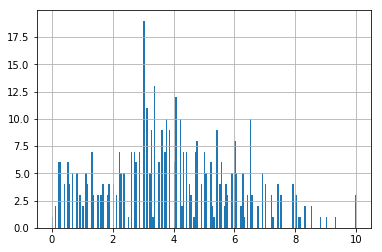

In [37]:

#CategoricalAttributes = ['ZIPCode','Education Level','Does the customer have a securities account with the bank?','Does the customer have a certificate of deposit (CD) account with the bank?','Does the customer use internet banking facilities?','Does the customer uses a credit card issued by UniversalBank?',]
#NumericalAttributes = ['Age','Number of years of experience','Annual Income','Family size','Avgerage spending per month','Mortgage Value of house if any']
#for i in attributes:
 
classOneData['Avgerage spending per month'].hist(bins=200,density=False)
print("classOneData['Avgerage spending per month'] histogram")
#classOneData['Annual Income'].hist(bins=200,density=False)

In [19]:
GivenDataSet.head()

,ID,Age,Number of years of experience,Annual Income,ZIPCode,Family size,Avgerage spending per month,Education Level,Mortgage Value of house if any,class,Does the customer have a securities account with the bank?,Does the customer have a certificate of deposit (CD) account with the bank?,Does the customer use internet banking facilities?,Does the customer uses a credit card issued by UniversalBank?
0,538,44,20.0,131,90717,1,4.90,3.0,0,1.0,0.0,0.0,1.0,0.0
1,1605,55,29.0,111,90502,2,3.60,3.0,0,1.0,0.0,0.0,0.0,1.0
2,3369,45,18.0,163,94720,3,5.33,2.0,0,1.0,0.0,1.0,0.0,1.0
3,3297,63,37.0,132,94080,1,4.40,2.0,0,1.0,0.0,0.0,1.0,0.0
4,152,26,0.0,132,92834,3,6.50,3.0,0,1.0,0.0,0.0,0.0,1.0


In [ ]:
GivenDataSet = train
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
Noneed = ['ID','ZIPCode']
for i in GivenDataSet.columns:
    for j in GivenDataSet.columns:
        if i!=j and i not in Noneed and j  not in Noneed:
            p= list(GivenDataSet[i])
            q= list(GivenDataSet[j])           
            fig = plt.figure(figsize=(8,8))
            plt.scatter(p, q, color='red',alpha = 0.5)    
            plt.xlabel(i)
            plt.ylabel(j)
#plt.savefig('../output_data/pic1.png')
#plt.title('')
